In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.getcwd())
cwd = os.getcwd()
# Any results you write to the current directory are saved as output.

/content


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code
Enter your authorization code:
··········
Mounted at /gdrive


In [3]:
cd /gdrive/My\ Drive/lab_project02

/gdrive/My Drive/lab_project02


In [4]:
ls -l

total 1048872
drwx------ 2 root root      4096 Sep 17 01:33 18.09.16(InceptionResnet_model_tb)/
drwx------ 2 root root      4096 Sep 17 01:41 18.09.17(DenseNet121_model_tb)/
-rw------- 1 root root  85464296 Sep 17 06:04 DenseNet121_decay_model.h5
-rw------- 1 root root  29120624 Sep 17 07:47 DenseNet121_decay_weights(18_09_17).h5
-rw------- 1 root root  85462112 Sep 17 03:08 DenseNet121_model.h5
-rw------- 1 root root    151161 Sep 17 09:36 DenseNet.ipynb
-rw------- 1 root root    151433 Sep 17 09:35 DenseNet_next_fitting.ipynb
-rw------- 1 root root 654333608 Sep 16 14:13 InceptionResNetV2_valchack_model.h5
-rw------- 1 root root 219057808 Sep 16 14:21 InceptionResNetV2_weights(18_09_15).h5
drwx------ 2 root root      4096 Aug 30 01:15 last_img_data/
-rw------- 1 root root     42188 Sep 16 05:23 model(18_08_28).ipynb
-rw------- 1 root root    241911 Sep 16 14:46 model_InceptionResNetV2.ipynb
-rw------- 1 root root         1 Sep 17 07:53 project  model설명.gdoc
drwx------ 2 root root

In [5]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Softmax,Input,Flatten
from keras.optimizers import Adam,RMSprop,SGD
from keras.layers.merge import add
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import BatchNormalization
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img

from IPython.display import display
from  PIL import Image

Using TensorFlow backend.


In [0]:
# dimensions of our images.
img_width, img_height = 579, 238
# img_width, img_height = 150, 150 # VGG 적용

In [0]:
train_data_dir = './split_data/train'
validation_data_dir = './split_data/val'
test_data_dir = './split_data/test'
# validation_data_dir = cwd + '/chest_xray/val'
# test_data_dir = cwd + '/chest_xray/test'

# nb_train_samples = 5217
# nb_validation_samples = 17
epochs = 20
batch_size = 16

In [0]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
train_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [0]:
validation_datagen = ImageDataGenerator(rescale=1. / 255)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 6397 images belonging to 8 classes.


In [13]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 800 images belonging to 8 classes.


In [14]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 800 images belonging to 8 classes.


In [1]:
from keras.applications.densenet import DenseNet121

Using TensorFlow backend.


In [0]:
DenseNet121_model = VGG16(include_top=True, input_shape=(579, 238, 3), classes=8, weights=None)

In [17]:
DenseNet121_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 579, 238, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 585, 244, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 290, 119, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 290, 119, 64) 256         conv1/conv[0][0]                 
__________________________________________________________________________________________________
conv1/relu

In [0]:
from keras.models import Model
from keras.preprocessing import image

In [35]:
model = Model(DenseNet121_model.input, output=DenseNet121_model.get_layer('fc1000').output)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(Tensor("in..., outputs=Tensor("fc...)`
  """Entry point for launching an IPython kernel.


In [0]:
from keras.optimizers import Adam

In [0]:
adam = Adam(decay=0.01)

In [0]:
model.compile(optimizer=adam, loss='categorical_crossentropy',  metrics=['accuracy']) # if single-label classification

In [0]:
import keras.backend.tensorflow_backend as K
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

In [0]:
# checkpoint = ModelCheckpoint("test_audio_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
tb = TensorBoard(log_dir='18.09.17(next_fit_model_tb)')

In [0]:
checkpoint = ModelCheckpoint("next_fit_model.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

In [24]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 8989817006361963587
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281989632
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6430421380566600348
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [22]:
with K.tf.device('/gpu:0'):
    hist = model.fit_generator(
        train_generator,
        validation_data = validation_generator,
        epochs = epochs,
        callbacks = [tb, checkpoint, early]
    )

Epoch 1/20
400/400 [==============================] - 2425s 6s/step - loss: 1.1703 - acc: 0.5945 - val_loss: 1.5518 - val_acc: 0.4950

Epoch 00001: val_acc improved from -inf to 0.49500, saving model to next_fit_model.h5
Epoch 2/20
400/400 [==============================] - 605s 2s/step - loss: 1.1049 - acc: 0.6144 - val_loss: 1.3771 - val_acc: 0.5387

Epoch 00002: val_acc improved from 0.49500 to 0.53875, saving model to next_fit_model.h5
Epoch 3/20
400/400 [==============================] - 605s 2s/step - loss: 1.0791 - acc: 0.6275 - val_loss: 1.3245 - val_acc: 0.5513

Epoch 00003: val_acc improved from 0.53875 to 0.55125, saving model to next_fit_model.h5
Epoch 4/20
400/400 [==============================] - 605s 2s/step - loss: 1.0656 - acc: 0.6289 - val_loss: 1.3662 - val_acc: 0.5350

Epoch 00004: val_acc did not improve from 0.55125
Epoch 5/20
400/400 [==============================] - 605s 2s/step - loss: 1.0477 - acc: 0.6383 - val_loss: 1.2995 - val_acc: 0.5600

Epoch 00005: va

In [23]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 56.38%


In [0]:
from keras.models import load_model
model = load_model('next_fit_model.h5')

In [25]:
# evaluate the saved model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 56.50%


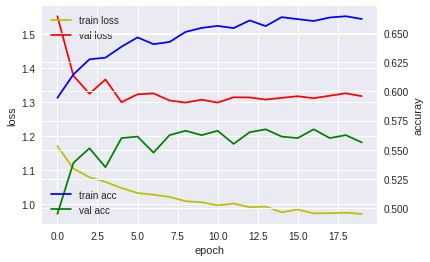

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
model.save_weights('DenseNet121_decay_weights(18_09_17).h5')